In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters
import sys
from binary import Otsu, Entropy

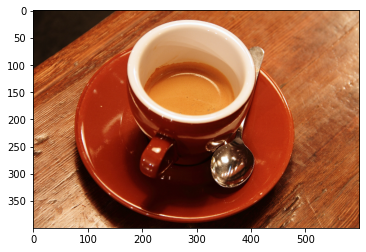

In [2]:
camera = data.coffee()
plt.imshow(camera, cmap='gray')

In [3]:
c_ot = Otsu(camera)
c_en = Entropy(camera)

In [4]:
c_en.threshold()

119

In [7]:
c_ot.threshold()

110

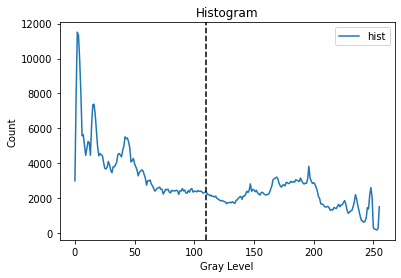

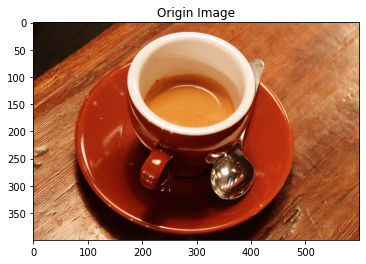

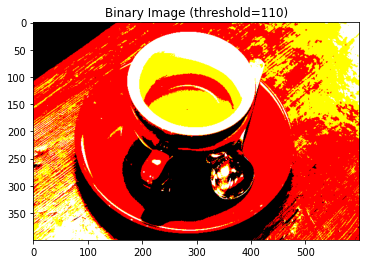

In [9]:
c_ot()

In [4]:
%timeit Otsu(camera).threshold()

20.6 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
Otsu(camera).threshold()

88

In [8]:
class Entropy:
    def __init__(self, img):
        self.img = img
        self.gray_levels = np.arange(256)
        self.shape = self.img.shape
        self.flatten_img = np.reshape(np.array(self.img), np.prod(self.shape))
        self.hist = np.array([len(self.flatten_img[self.flatten_img==i]) for i in self.gray_levels])
        
    def plot_hist(self):
        plt.plot(self.gray_levels, self.hist, label="hist")
        plt.title("Histogram")
        plt.xlabel("Gray Level")
        plt.ylabel("Count")
        plt.legend()
        
    def plot_threshuld_to_entropy(self):
        plt.plot(self.gray_levels, [self.H(i) for i in range(256)], label="entropy")
        plt.title("Entropy-Threshold")
        plt.xlabel("Gray Level")
        plt.ylabel("Entropy")
        plt.legend()
    
    def show_origin_image(self):
        plt.imshow(self.img, cmap='gray')
        plt.title("Origin Image")
    
    def show_binary_image(self, T=None):
        if T is None:
            T = self.threshold()
        bin_image = np.zeros(self.shape)
        bin_image[self.img>T] = 1
        plt.imshow(bin_image, cmap='gray')
        plt.title(f"Binary Image (threshold={T})")

    def H(self, T):
        hist_b, hist_w = self.hist[:T], self.hist[T:]
        N_b = np.sum(hist_b)
        N_w = np.sum(hist_w)
        
        p_i_b = hist_b/N_b
        p_i_w = hist_w/N_w
        
        H_b = -np.sum(p_i_b*np.log(p_i_b))
        H_w = -np.sum(p_i_w*np.log(p_i_w))
        return H_b+H_w

    def threshold(self):
        return np.argmax([ec.H(i) for i in range(256)])

In [9]:
ec = Entropy(camera)
T=123

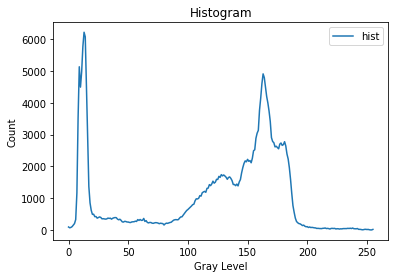

In [10]:
ec.plot_hist()

In [11]:
ec.threshold()

196

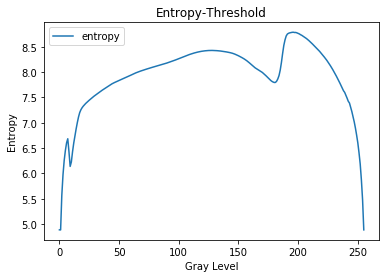

In [12]:
ec.plot_threshuld_to_entropy()

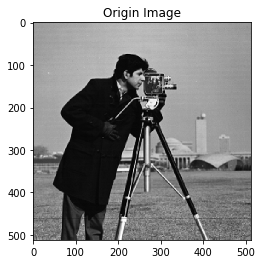

In [13]:
ec.show_origin_image()

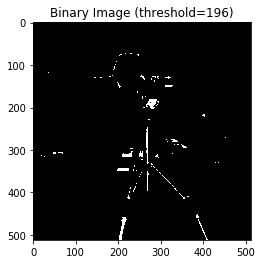

In [14]:
ec.show_binary_image()